### Esercitazione 4 - Supporti e resistenze, statici e dinamici e trend-line
#### Argomenti

* trendline: supporti e resistenze
* supporti e resistenze dinamici

<img src='images/bearish-bullish-fractal.png'/>

<img src='images/supporto-resistenza.png'/>

<img src='images/supporto-resistenza-dinamici.png'/>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import MetaTrader5 as mt5
import mplfinance as mpf
import numpy as np

In [2]:
connected = mt5.initialize(login=5776609, server="ActivTrades-Server", password='YDSNcmto')

if connected:
    candles = pd.DataFrame(mt5.copy_rates_from_pos('EURUSD', mt5.TIMEFRAME_H1, 0, 150))
    mt5.shutdown()
else:
    print('MT5 account error.')

candles['time'] = pd.to_datetime(candles['time'], unit='s')
candles.set_index('time', inplace=True)

candles.head()

,open,high,low,close,tick_volume,spread,real_volume
time,,,,,,,
2022-10-05 10:00:00,0.99401,0.99479,0.99223,0.99469,8261,5,0
2022-10-05 11:00:00,0.99469,0.99515,0.99207,0.99300,6231,5,0
2022-10-05 12:00:00,0.99300,0.99312,0.99106,0.99238,6013,5,0
2022-10-05 13:00:00,0.99236,0.99267,0.98991,0.99049,6840,5,0
2022-10-05 14:00:00,0.99049,0.99228,0.98915,0.99110,10654,5,0


In [3]:
# pattern "bullish"
def is_resistance(candles_dataframe, i):
  cond1 = candles_dataframe['high'][i] > candles_dataframe['high'][i-1]
  cond2 = candles_dataframe['high'][i] > candles_dataframe['high'][i+1]
  cond3 = candles_dataframe['high'][i+1] > candles_dataframe['high'][i+2]
  cond4 = candles_dataframe['high'][i-1] > candles_dataframe['high'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

# pattern "bearish"
def is_support(candles_dataframe, i):
  cond1 = candles_dataframe['low'][i] < candles_dataframe['low'][i-1]
  cond2 = candles_dataframe['low'][i] < candles_dataframe['low'][i+1]
  cond3 = candles_dataframe['low'][i+1] < candles_dataframe['low'][i+2]
  cond4 = candles_dataframe['low'][i-1] < candles_dataframe['low'][i-2]
  return (cond1 and cond2 and cond3 and cond4)

# check sul nuovo livello di prezzo da aggiungere
# se è abbastanza lontano dagli altri già trovati
def is_far_from_level(value, levels, df):
    media = np.mean(df['high'] - df['low'])
    return np.sum([abs(value - level) < media for level in levels])==0

levels = []
for i in range(2, candles.shape[0] - 2):
    if is_support(candles, i):
        low = candles['low'][i]
        if is_far_from_level(low, levels, candles):
            levels.append(low)
    elif is_resistance(candles, i):
        high = candles['high'][i]
        if is_far_from_level(high, levels, candles):
            levels.append(high)

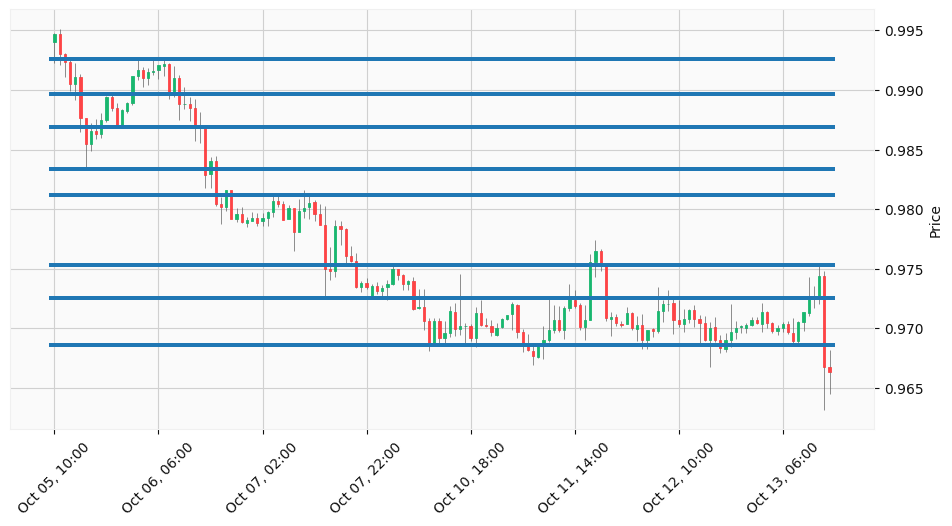

In [4]:
# visualizzazione

mpf.plot(candles, hlines=levels, type='candle', style='yahoo', figsize=(12, 6))

#### Creazione di trend-line dinamiche

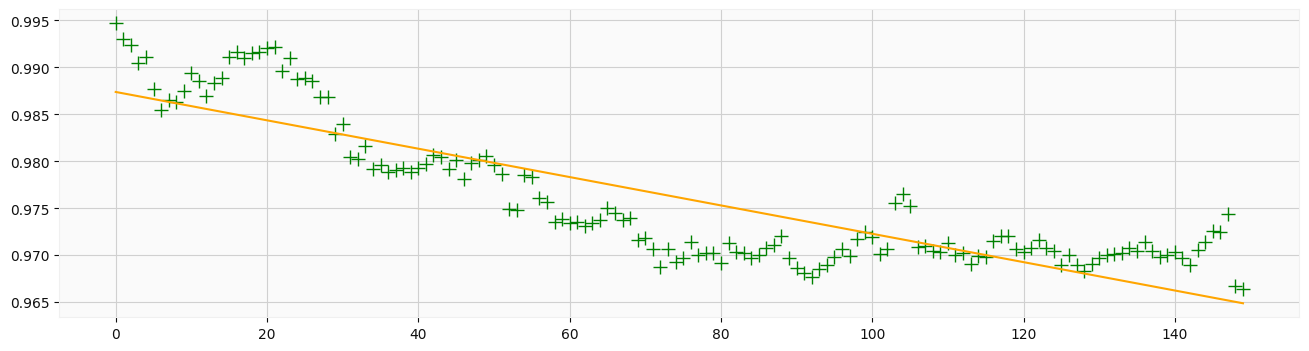

In [5]:
# utilizzo di una regressione polinomiale
# per tracciare una linea di trend relativa
# al prezzo di chiusura nelle candele selezionate

def plot_trend_line(candles_dataframe, x_base):
    xs = [x + x_base for x in range(len(candles_dataframe))]
    plt.plot(xs, candles_dataframe.close.values, "+", ms=10, color='green')
    z = np.polyfit(xs, candles_dataframe.close.values, 1)
    ys = np.poly1d(z)(xs)
    plt.plot(xs, ys, color='orange')

plt.figure(figsize=(16, 4))
plot_trend_line(candles, 0)
plt.show()

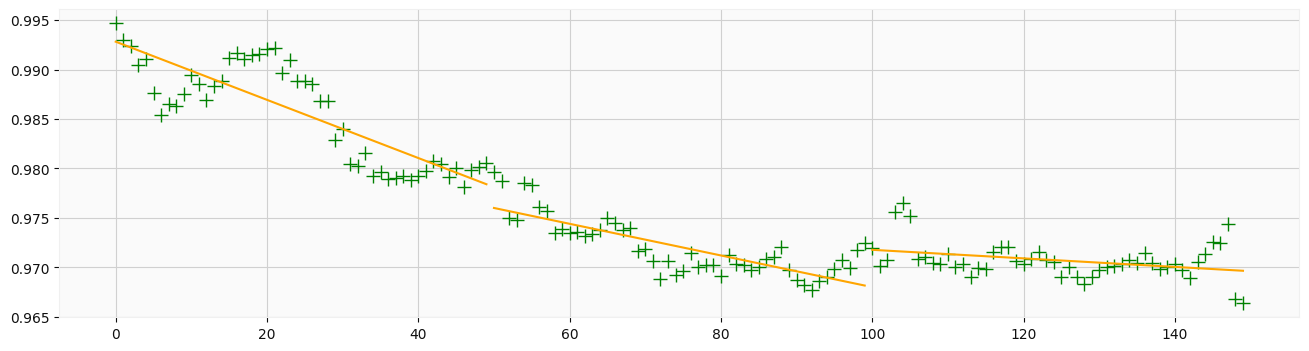

In [6]:
c1 = candles[:50]
c2 = candles[50:100]
c3 = candles[100:]

plt.figure(figsize=(16, 4))
plot_trend_line(c1, 0)
plot_trend_line(c2, 50)
plot_trend_line(c3, 100)
plt.show()

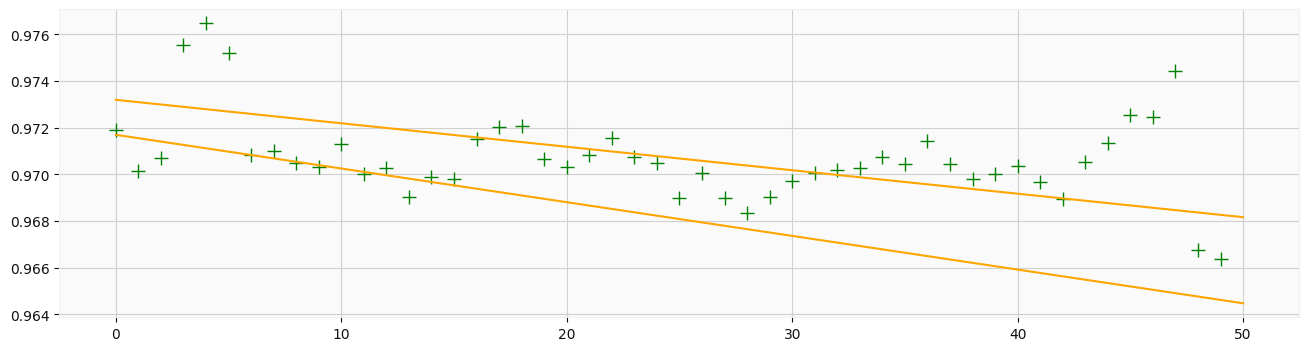

In [8]:
# utilizzo della prima e ultima candela
# nel dataset per tracciare due trend-line
# relative ai massimi e minimi dei livelli
# di prezzo

def plot_trend_line(candles_dataframe):
    xs = [x for x in range(len(candles_dataframe))]
    xs_trend = [0, len(candles_dataframe)]
    plt.plot(xs, candles_dataframe.close.values, "+", ms=10, color='green')

    plt.plot(xs_trend, [candles_dataframe.high[0], candles_dataframe.high[-1]], color='orange')
    plt.plot(xs_trend, [candles_dataframe.low[0], candles_dataframe.low[-1]], color='orange')

plt.figure(figsize=(16, 4))
plot_trend_line(c3)
plt.show()